STROKE PREDICTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset.shape

(5110, 12)

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Removing id column

In [5]:
dataset.drop(['id'], axis = 1,inplace=True)

In [6]:
dataset.shape

(5110, 11)

In [7]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


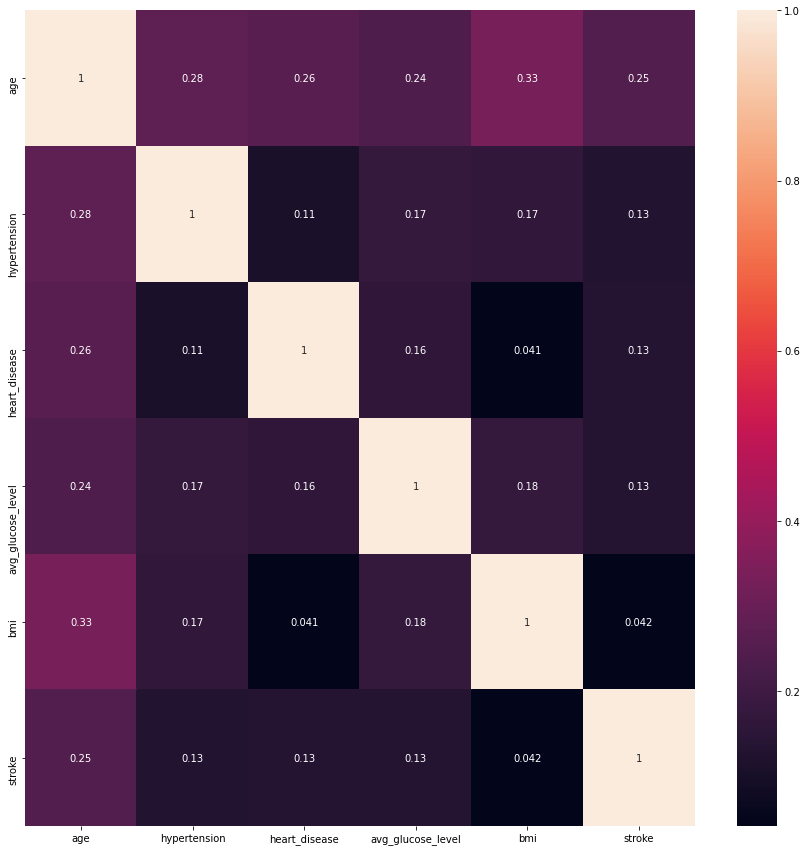

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True)

Checking how many null values we have

In [9]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Replacing missing values in bmi column with mean of all other values in bmi column

In [10]:
dataset['bmi']=dataset['bmi'].replace(np.NaN,dataset['bmi'].mean())

In [11]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Checking no. of unique values in ever_married,work_type,residence_type and smoking_status columns

In [13]:
print(dataset['ever_married'].unique())
print(dataset['work_type'].unique())
print(dataset['Residence_type'].unique())
print(dataset['smoking_status'].unique())
print(dataset['stroke'].unique())
dataset.value_counts('stroke')

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


stroke
0    4861
1     249
dtype: int64

Plotting Countplots

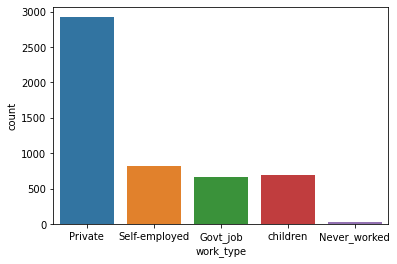

In [14]:
sns.countplot(x = dataset['work_type'])

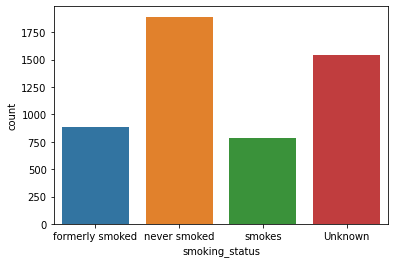

In [15]:
sns.countplot(x = dataset['smoking_status'])

Label encoding ever_married column

In [16]:
from sklearn.preprocessing import LabelEncoder
dataset['ever_married'] = LabelEncoder().fit_transform(dataset['ever_married'])

In [17]:
dataset.head()  #1 is yes,0 is no

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


Label encoding Residence_type column

In [18]:
from sklearn.preprocessing import LabelEncoder
dataset['Residence_type'] = LabelEncoder().fit_transform(dataset['Residence_type'])

In [19]:
dataset.head()  #1 for urban,0 for rural

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


Splitting to X and y

In [20]:
X=dataset.iloc[:,0:10].values
y=dataset.iloc[:,10].values

In [21]:
print(X)

[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Female' 61.0 0 ... 202.21 28.893236911794673 'never smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ...
 ['Female' 35.0 0 ... 82.99 30.6 'never smoked']
 ['Male' 51.0 0 ... 166.29 25.6 'formerly smoked']
 ['Female' 44.0 0 ... 85.28 26.2 'Unknown']]


In [22]:
X.shape

(5110, 10)

In [23]:
X = pd.DataFrame(X, columns =['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']) 

In [24]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,1,Private,1,228.69,36.6,formerly smoked
1,Female,61,0,0,1,Self-employed,0,202.21,28.8932,never smoked
2,Male,80,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79,1,0,1,Self-employed,0,174.12,24,never smoked


In [25]:
print(y)

[1 1 1 ... 0 0 0]


One hot encoding

In [26]:
columns_dummies = ['work_type','smoking_status','gender']

In [27]:
X = pd.get_dummies(X, columns=columns_dummies, prefix_sep='_', drop_first=True)

In [28]:
X.head(3)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other
0,67,0,1,1,1,228.69,36.6,0,1,0,0,1,0,0,1,0
1,61,0,0,1,0,202.21,28.8932,0,0,1,0,0,1,0,0,0
2,80,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,1,0


Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [30]:
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other
3029,36,0,0,1,0,67.29,36.7,0,1,0,0,1,0,0,0,0
2277,34,0,0,1,0,83.53,48.5,0,1,0,0,1,0,0,0,0
3002,60,0,0,1,0,65.16,30.8,0,1,0,0,0,1,0,1,0
246,75,0,0,1,0,78.8,29.3,0,0,1,0,1,0,0,0,0
2825,76,0,0,1,1,58.65,25.6,0,1,0,0,0,0,1,1,0


In [31]:
X_test.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other
42,82,0,1,1,1,144.9,26.4,0,1,0,0,0,0,1,1,0
380,4,0,0,0,0,106.22,16.7,0,0,0,1,0,0,0,1,0
3524,58,0,0,1,1,79.95,25.9,0,1,0,0,0,1,0,1,0
352,20,0,0,0,0,96.57,34.1,0,1,0,0,0,1,0,0,0
4927,10,0,0,0,0,69.84,13.7,0,0,0,1,0,0,0,0,0


In [32]:
print(y_test)

[1 0 0 ... 0 1 0]


Feature Scaling to clumn w index 1,6,7

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:1] = sc.fit_transform(X_train.iloc[:,0:1])   #age
X_test.iloc[:,0:1] = sc.fit_transform(X_test.iloc[:,0:1]) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [34]:
print(X_train)

           age hypertension  ... gender_Male gender_Other
3029 -0.328243            0  ...           0            0
2277 -0.416494            0  ...           0            0
3002  0.730767            0  ...           1            0
246   1.392648            0  ...           0            0
2825  1.436774            0  ...           1            0
...        ...          ...  ...         ...          ...
4931  0.421889            1  ...           0            0
3264  0.774893            0  ...           0            0
1653  0.024760            0  ...           1            0
2607 -0.990124            0  ...           1            0
2732  0.642516            1  ...           0            0

[4088 rows x 16 columns]


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,5:6] = sc.fit_transform(X_train.iloc[:,5:6])   #average_glucose_level
X_test.iloc[:,5:6] = sc.fit_transform(X_test.iloc[:,5:6]) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,6:7] = sc.fit_transform(X_train.iloc[:,6:7])   #bmi
X_test.iloc[:,6:7] = sc.fit_transform(X_test.iloc[:,6:7]) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [37]:
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other
3029,-0.328243,0,0,1,0,-0.860231,0.995134,0,1,0,0,1,0,0,0,0
2277,-0.416494,0,0,1,0,-0.501703,2.501520,0,1,0,0,1,0,0,0,0
3002,0.730767,0,0,1,0,-0.907255,0.241941,0,1,0,0,0,1,0,1,0
246,1.392648,0,0,1,0,-0.606126,0.050451,0,0,1,0,1,0,0,0,0
2825,1.436774,0,0,1,1,-1.050975,-0.421890,0,1,0,0,0,0,1,1,0


In [38]:
X_train.shape

(4088, 16)

Seeing which features are most important

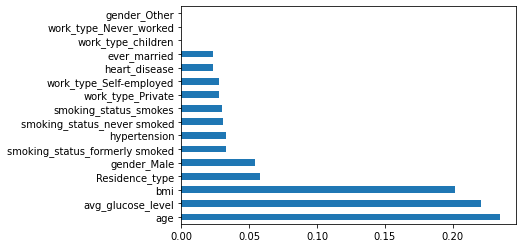

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

Dropping gender_Other, work_type_Never_worked and work_type_children

In [40]:
X_train.drop(['gender_Other','work_type_Never_worked','work_type_children'], axis = 1,inplace=True)
X_test.drop(['gender_Other','work_type_Never_worked','work_type_children'], axis = 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
X_train.shape

(4088, 13)

Training Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)   #high accuracy but poor recall since model only predicts 0 since data is unbalanced

[[968   0]
 [ 53   1]]


0.9481409001956947

In [45]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(criterion='entropy')
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_pred1=classifier1.predict(X_test)

In [48]:
print(y_pred1)

[0 0 0 ... 0 0 0]


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)
accuracy_score(y_test,y_pred1)

[[930  38]
 [ 51   3]]


0.9129158512720157

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.07      0.06      0.06        54

    accuracy                           0.91      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.90      0.91      0.91      1022



Handling imbalanced data by Oversampling using SMOTE algorithm

Handling Imbalanced data: Since the dataset contains most instances of an negative stroke so there might be a possibility that the model built on this dataset classifies the person having stroke as the person who don't have stroke(known as False Negative).

In [51]:
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_1, y_1 = sm.fit_sample(X_train, y_train)
print("After OverSampling, counts of label '1' in y_1: {}".format(sum(y_1 == 1))) 
print("After OverSampling, counts of label '0' in y_1: {}".format(sum(y_1 == 0))) 

Before OverSampling, counts of label '1' in training set: 195
Before OverSampling, counts of label '0' in training set: 3893 

After OverSampling, counts of label '1' in y_1: 3893
After OverSampling, counts of label '0' in y_1: 3893


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [52]:
X_train.shape   #3893+195=4088

(4088, 13)

Splitting the balanced data now

In [53]:
from sklearn.model_selection import train_test_split #now X_1 and y_1 have 3893+3893 rows=7786 rows
X_train1,X_test1,y_train1,y_test1=train_test_split(X_1,y_1,test_size=0.20,random_state=0)

In [54]:
X_train1.shape        #0.8*7786=6228 rows

(6228, 13)

In [55]:
X_test1.shape

(1558, 13)

Training oversampled,balanced data with Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(criterion='entropy')
classifier2.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
y_pred2=classifier2.predict(X_test1)

In [58]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test1.reshape(len(y_test1),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2=confusion_matrix(y_test1,y_pred2)
print(cm2)
accuracy_score(y_test1,y_pred2)  #high accuracy with good recall,support since now data has been balanced 

[[687  74]
 [ 50 747]]


0.920410783055199

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test1,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       761
           1       0.91      0.94      0.92       797

    accuracy                           0.92      1558
   macro avg       0.92      0.92      0.92      1558
weighted avg       0.92      0.92      0.92      1558



Training Oversampled,balanced data with Logistic Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression
classifier4=LogisticRegression()
classifier4.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred4=classifier4.predict(X_test1)
print(y_pred4)

[0 1 1 ... 0 1 0]


In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm4=confusion_matrix(y_test1,y_pred4)
print(cm4)
accuracy_score(y_test1,y_pred4)

[[578 183]
 [121 676]]


0.8048780487804879

Now we try to balance imbalanced data using undersampling by using NearMiss algorithm

In [64]:
print("Before Undersampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 
  
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_2, y_2 = nr.fit_sample(X_train, y_train)

print("After Undersampling, counts of label '1' in y_2: {}".format(sum(y_2 == 1))) 
print("After Undersampling, counts of label '0' in y_2: {}".format(sum(y_2 == 0))) 

Before Undersampling, counts of label '1' in training set: 195
Before Undersampling, counts of label '0' in training set: 3893 

After Undersampling, counts of label '1' in y_2: 195
After Undersampling, counts of label '0' in y_2: 195


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Splitting the undersampled, balanced data now

In [65]:
from sklearn.model_selection import train_test_split #now X_2 and y_2 have 195+195 rows=390 rows
X_train2,X_test2,y_train2,y_test2=train_test_split(X_2,y_2,test_size=0.20,random_state=0)

In [66]:
X_train2.shape  #0.8*390=312

(312, 13)

In [67]:
X_test2.shape

(78, 13)

Training undersampled,balanced data with Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion='entropy')
classifier3.fit(X_train2,y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
y_pred3=classifier3.predict(X_test2)

In [70]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test2.reshape(len(y_test2),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3=confusion_matrix(y_test2,y_pred3)
print(cm3)
accuracy_score(y_test2,y_pred3)

[[31  8]
 [ 9 30]]


0.782051282051282

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test2,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.79      0.77      0.78        39

    accuracy                           0.78        78
   macro avg       0.78      0.78      0.78        78
weighted avg       0.78      0.78      0.78        78



Training undersampled,balanced data with Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression
classifier5=LogisticRegression()
classifier5.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred5=classifier5.predict(X_test2)
print(y_pred5)

[0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 0 1 1]


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5=confusion_matrix(y_test2,y_pred5)
print(cm5)
accuracy_score(y_test2,y_pred5)

[[32  7]
 [ 8 31]]


0.8076923076923077